#SF crime data analysis and modeling

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import datetime
from pyspark.sql.functions import year, month, dayofmonth
os.environ["PYSPARK_PYTHON"] = "python3"
%matplotlib inline

In [0]:
#download the data from official website
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))

path,name,size
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,559169754


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"

In [0]:
#get the dataframe 
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

from pyspark.sql.functions import to_date, to_timestamp, hour
df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
4018830907041,040188309,07041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
13605159706372,136051597,06372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),32,1,10,20,8,2,9,28853,19,null,null,null,null,null,null,2,null,null,null,null,32
13618826906244,136188269,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),null,3,5,20,8,4,5,28853,19,null,null,null,3,null,null,2,null,null,3,null,null
4098938926105,040989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),49,7,8,38,1,5,4,59,38,null,null,null,null,null,null,1,null,null,null,null,49
5085058207021,050850582,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),66,9,1,28,9,7,6,28861,25,null,null,null,null,null,null,2,null,null,null,null,66
13085582009320,130855820,09320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),13,8,6,18,15,5,1,54,16,null,null,null,null,null,null,1,null,null,null,null,13
11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,1,null,null,null,null,86
5116515606241,051165156,06241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),103,4,11,15,15,6,11,29490,13,null,null,null,null,null,null,2,null,null,null,null,103
5099200968020,050992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),109,10,8,14,1,8,4,56,12,null,null,null,null,null,null,1,null,null,null,null,109
9118446702004,091184467,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),20,5,10,36,5,10,9,28852,36,null,null,null,null,null,null,2,1,1,null,null,20


##1.counts the number of crimes for different category.

In [0]:
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


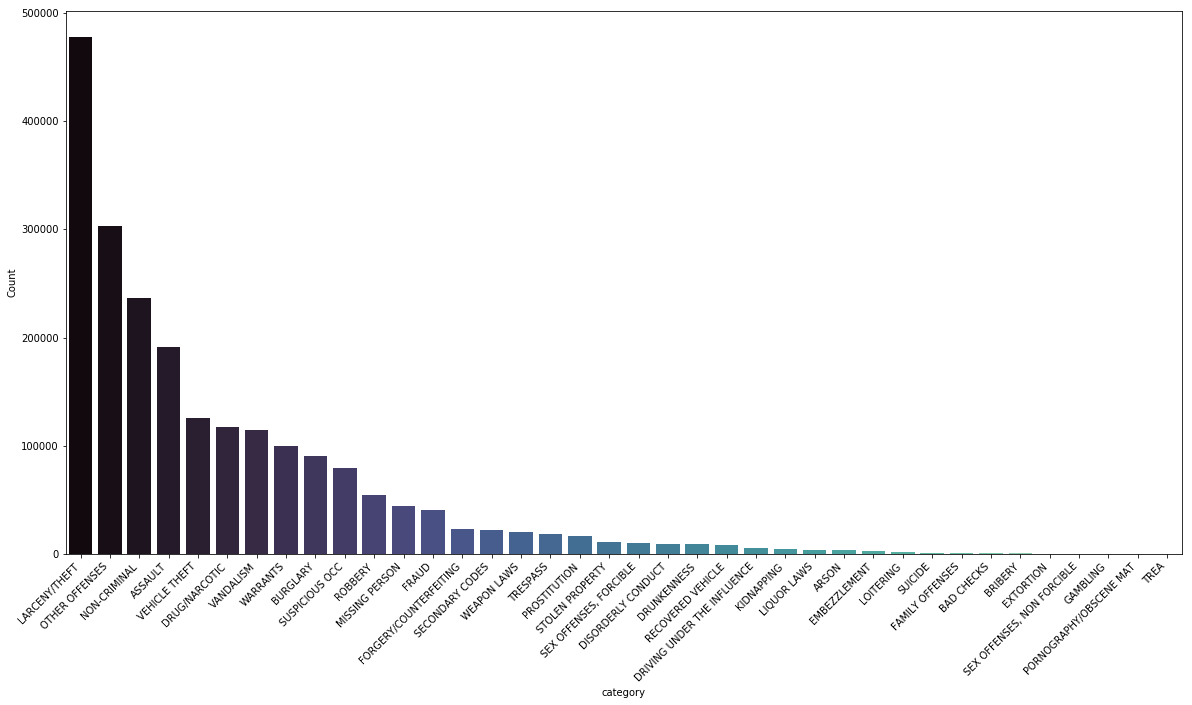

In [0]:
#visualize the result 
crimes_pd_df = crimeCategory.toPandas()
plt.figure(figsize=(20, 10))
chart = sns.barplot(x = 'category', y = 'Count', palette= 'mako',data = crimes_pd_df )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

##2.counts the number of crimes for different district.

In [0]:
#Counts the number of crimes for different district
crimeDistrict = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,394234
MISSION,293072
NORTHERN,269229
CENTRAL,223962
BAYVIEW,210729
TENDERLOIN,189034
INGLESIDE,186645
TARAVAL,158710
PARK,121070
RICHMOND,114267


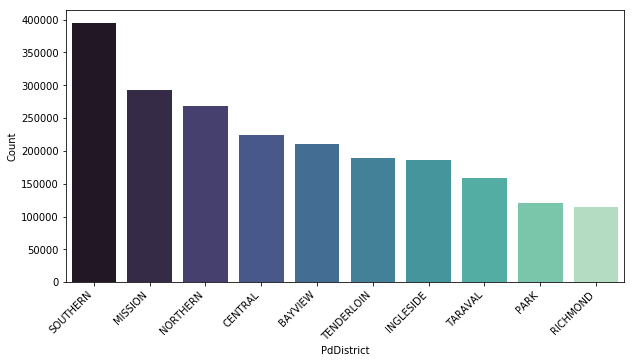

In [0]:
#visualize the result 
criDistrict_pd_df = crimeDistrict.toPandas()
plt.figure(figsize=(10, 5))
chart = sns.barplot(x = 'PdDistrict', y = 'Count', palette= 'mako',data = criDistrict_pd_df )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

##3.Count the number of crimes each "Sunday" at "SF downtown".

In [0]:
#Count the number of crimes each "Sunday" at "SF downtown".
sundayCrime = spark.sql("""SELECT Date, COUNT(*) AS Count FROM sf_crime WHERE DayOfWeek = 'Sunday'
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 
                          GROUP BY Date ORDER BY Date""")

In [0]:
#visualize the result 
display(sundayCrime)

Date,Count
01/01/2006,23
01/01/2012,14
01/01/2017,31
01/02/2005,8
01/02/2011,7
01/03/2010,17
01/03/2016,9
01/04/2004,14
01/04/2009,10
01/04/2015,12


## 4. Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
#count the number of crime in each month of 2015, 2016, 2017, 2018.
crimeMonthly = spark.sql("""
                    WITH cm AS (
                    SELECT Date, substring(Date,7) As Year, substring(Date,1,2) As Month 
                    FROM sf_crime
                    )
          
                    SELECT Year, Month, COUNT(*) AS Count 
                    FROM cm 
                    WHERE Year BETWEEN 2015 AND 2018 
                    GROUP BY Year, Month 
                    ORDER BY Year, Month""")
display(crimeMonthly)

Year,Month,Count
2015,01,13370
2015,02,12055
2015,03,13674
2015,04,12705
2015,05,13511
2015,06,13073
2015,07,13158
2015,08,13523
2015,09,12666
2015,10,12889


1. Through the graph, we can see that the number of crimes decreased sharply from 2017 to 2018, and in 2015-2017, the number of crimes are basically flat. 
2. The reduction of the number of crime cases will bring economic development. For companies, they can choose to open up more offline stores in SF.

## 5. Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col, udf
hour_func = udf (lambda x: float(x[:2]), FloatType())
df = df_opt1.withColumn('hour', hour_func(col('Time')))
crimeHourly = df.filter((df.Date == '12/15/2015') | (df.Date == '12/15/2016') | (df.Date == '12/15/2017'))\
       .groupBy('hour').count()
display(crimeHourly)

hour,count
18.0,85
9.0,47
5.0,11
17.0,64
23.0,54
11.0,58
7.0,22
2.0,25
14.0,57
21.0,49


Through this graph we can see that the peaks of crime happened during the lunch time, dinner time and midnight. I would suggest the tourists pay attention to personal safety during those timeslots.

##6
   ##(1) Step1: Find out the top-3 danger disrict
   ##(2) Step2: find out the crime event w.r.t category and time (hour)   from the result of step 1
   ##(3) give your advice to distribute the police based on your analysis results.

In [0]:
#count the crime of each district
crimeTopDistict = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False).limit(3)
display(crimeTopDistict)

PdDistrict,count
SOUTHERN,394234
MISSION,293072
NORTHERN,269229


In [0]:
crimeCategoryTime = df.filter((df.PdDistrict == 'SOUTHERN') | (df.PdDistrict == 'MISSION') | (df.PdDistrict == 'NORTHERN'))\
            .groupBy('category', 'hour').count().orderBy('hour')
display(crimeCategoryTime)

category,hour,count
MISSING PERSON,0.0,784
EXTORTION,0.0,29
LOITERING,0.0,48
DRUG/NARCOTIC,0.0,1757
"SEX OFFENSES, NON FORCIBLE",0.0,47
DRIVING UNDER THE INFLUENCE,0.0,272
STOLEN PROPERTY,0.0,297
DISORDERLY CONDUCT,0.0,301
ASSAULT,0.0,4675
VEHICLE THEFT,0.0,1568


From the chart we can see that the majority of crimes are larceny and theft. The peak hours of crimes cases are dinner time, lunch time and midnight. For police, more human resources can be deployed during these timeslots.

##7. For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
crimeResolution = spark.sql("""
                   WITH cr As (
                      SELECT Category, Resolution,
                             CASE WHEN Resolution In ('NONE') then 0
                             ELSE 1 end As isResolution
                      FROM sf_crime  
                   )
                   
                   SELECT Category, isResolution, Count(*) As Count
                   FROM cr
                   GROUP BY Category, isResolution
                   ORDER BY Category, isResolution
                   """)
display(crimeResolution)

Category,isResolution,Count
ARSON,0,3174
ARSON,1,701
ASSAULT,0,113747
ASSAULT,1,77637
BAD CHECKS,0,744
BAD CHECKS,1,180
BRIBERY,0,338
BRIBERY,1,458
BURGLARY,0,76653
BURGLARY,1,14414


In [0]:
#Find the percentage of resolution for different crime category 
crimeResPercent = spark.sql("""
                   WITH crp As (
                      SELECT Category, Resolution,
                             CASE WHEN Resolution In ('NONE') then 0
                             ELSE 1 end As isResolution
                      FROM sf_crime  
                   )
                   
                   SELECT Category, Count(*) As Count,
                          count( CASE WHEN isResolution = 1 then isResolution end) As CountRes,
                          count( CASE WHEN isResolution = 1 then isResolution end) * 100 / Count(*) As percent
                   FROM crp
                   GROUP BY Category
                   ORDER BY percent 
                   """)
display(crimeResPercent)

Category,Count,CountRes,percent
RECOVERED VEHICLE,8688,575,6.6183241252302025
VEHICLE THEFT,126228,10248,8.118642456507272
LARCENY/THEFT,477975,40048,8.378680893352163
SUSPICIOUS OCC,79740,8754,10.978179082016554
VANDALISM,114718,12940,11.279834027789885
BURGLARY,91067,14414,15.827906925670112
ARSON,3875,701,18.09032258064516
BAD CHECKS,924,180,19.48051948051948
EXTORTION,729,152,20.85048010973937
ROBBERY,54467,11385,20.902564855784238


The percentage of resolution for recovered vehicle, vehicle theft and larceny/theft are the three lowest. Larceny/theft is the most happened crime cases in SF, at the same time, it's resolution rate is low. Police can pay more attention on solving the theft-related cases, also, people in SF can increase vigilance regarding theft, such as improve their locker's security for their houses, pay more attention to their personal belongings in public, and so on.